### Analyse data Titanic Disaster

### Model: Decision Tree Regression

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startmodskl import *

local_kwargs {'data_path': './data/train.csv, ./data/titanic_no_nan.csv ,./data/test.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
# Process Nan_Column by dropping them
nonan_data = data[1]
StartML.nan_columns(nonan_data)

[]

In [3]:
# There are only numeric columns
StartML.idx_columns(nonan_data)

[('Survived', 0, dtype('int64')),
 ('Pclass', 1, dtype('int64')),
 ('Sex', 2, dtype('int64')),
 ('Age', 3, dtype('float64')),
 ('Ticket', 4, dtype('int64')),
 ('Fare', 5, dtype('float64')),
 ('Title', 6, dtype('int64')),
 ('FamilySize', 7, dtype('int64'))]

In [4]:
nonan_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,1,3,1,21.000000,401,7.7958,5,0
1,1,3,0,5.000000,329,31.3875,4,6
2,0,3,1,29.000000,315,7.0458,5,1
3,1,1,0,16.000000,591,39.4000,4,1
4,0,3,1,29.699118,568,69.5500,5,10


In [5]:
# normalize the data using the Min_Max method
StartMod.feature_scaling(nonan_data).head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,1.0,1.0,1.0,0.258608,0.589706,0.015216,0.625,0.0
1,1.0,1.0,0.0,0.057552,0.483824,0.061264,0.500,0.6
2,0.0,1.0,1.0,0.359135,0.463235,0.013752,0.625,0.1
3,1.0,0.0,0.0,0.195778,0.869118,0.076904,0.500,0.1
4,0.0,1.0,1.0,0.367921,0.835294,0.135753,0.625,1.0


Features:  Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Title', 'FamilySize'], dtype='object') 
Features_Important:  [ 0.07551799  0.28345569  0.1087498   0.27417212  0.16156262  0.04761873
  0.04892306]


/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


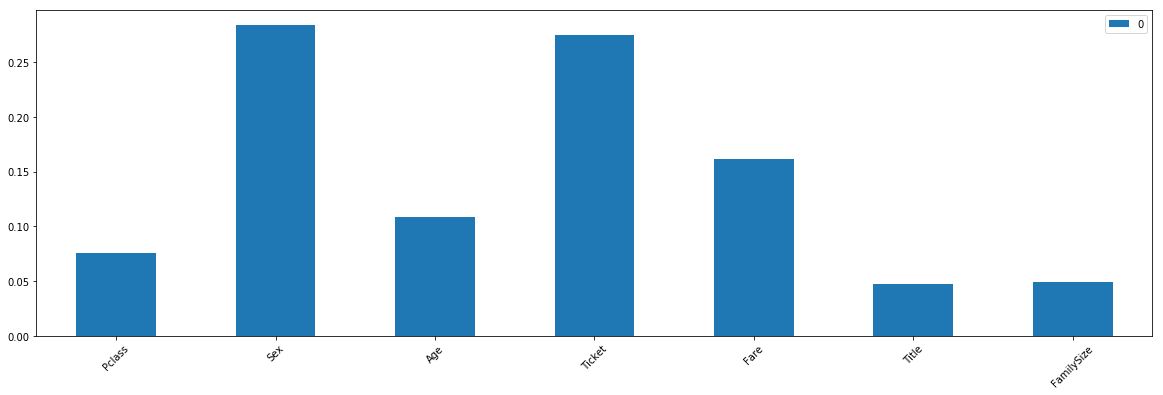

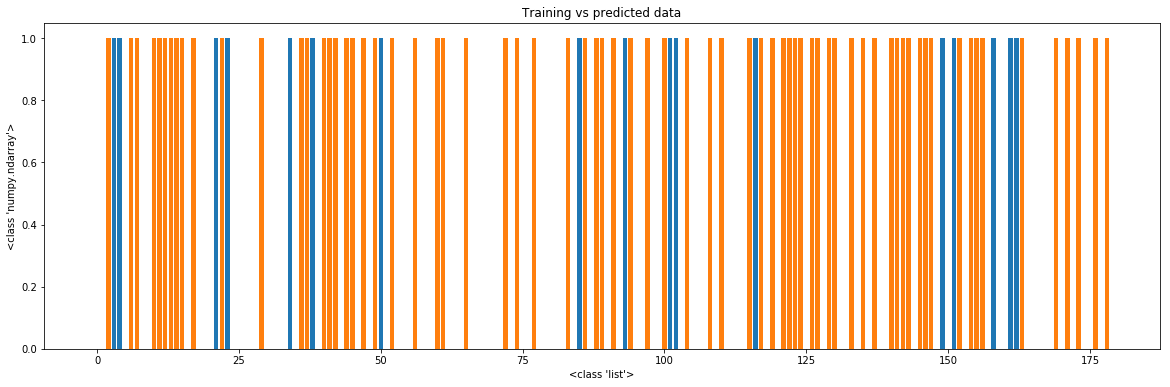

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [8]:
# Choose method Linear Regression to predict the Survivors
reg_dt, y_true, y_predict = StartModSKL.regression_decision_tree(nonan_data, 'Survived', vis=True)

reg_dt

In [9]:
reg_dt.feature_importances_

array([ 0.07551799,  0.28345569,  0.1087498 ,  0.27417212,  0.16156262,
        0.04761873,  0.04892306])

In [10]:
# Convert predicted value by rounding it (>0.5 will be considered as 1 else 0)
y_pred = np.array([np.round(item) for item in y_predict ])

# Compare the predicted value with true_value
len(y_true), len(y_pred)

(179, 179)

In [11]:
StartMod.metrics_report(y_true, y_pred)

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.84      0.82      0.83       111
        1.0       0.72      0.75      0.73        68

avg / total       0.80      0.79      0.79       179

Confusion Matrix: 
 [[91 20]
 [17 51]]

Mean_Squared_Error: 
 0.206703910615

Accuracy Score: 
 0.793296089385

Precision Score: 
 0.718309859155

Recall Score: 
 0.75

F-Score: 
 0.73381294964


### Result: 
#### the correct predicted result 142, 
#### the wrong predicted result 37